In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading Dataset matches
matches = pd.read_csv("matches.csv")
dfm=matches.copy()

In [5]:
#Reading Dataset matches
deliveries = pd.read_csv("deliveries.csv")
dfd=deliveries.copy()

How many matches we've got in the dataset?

In [6]:
#looking data contents using head in matches dataset
dfm.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
dfm.shape
#Total 636 Matches

(636, 18)

In [8]:
#looking data contents using head in deliveries dataset
dfd.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


How many seasons we've got in the dataset?

In [9]:
dfm.groupby('season').season.nunique().sum()
#10 Seasons

10

Which Team had won by maximum runs?

In [10]:
dfm.iloc[dfm['win_by_runs'].idxmax()].winner

'Mumbai Indians'

Which Team had won by maximum wicket?

In [11]:
dfm.iloc[dfm['win_by_wickets'].idxmax()].winner

'Kolkata Knight Riders'

Which Team had won by closest Margin (minimum runs)?

In [12]:
dfm.iloc[dfm['win_by_runs'].idxmin()].winner

'Rising Pune Supergiant'

Which Team had won by minimum wicket?

In [18]:
dfm[dfm[dfm['win_by_wickets']!=0].win_by_wickets.idxmin()].winner

KeyError: 559

Which Season had most number of matches?

In [31]:
dfm.shape

(636, 18)

Which IPL Team is more successful?

#### Analysing teams data

In [32]:
pd.unique(dfm.team1)

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [33]:
pd.unique(dfm.team2)

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

Above results suggests there are teams having similar names and entries with different spellings.Correcting these type of data.

In [34]:
#Finding teams having team name %Pune% or %Deccan%
dfm[dfm['team1'].str.contains("Pune|Deccan|Hyderabad ")].team1.value_counts()

Deccan Chargers            43
Pune Warriors              20
Rising Pune Supergiant      8
Rising Pune Supergiants     7
Name: team1, dtype: int64

In [35]:
#Finding teams having team name %Pune% or %Deccan%
dfm[dfm['team2'].str.contains("Pune|Deccan|Hyderabad")].team2.value_counts()

Deccan Chargers            32
Sunrisers Hyderabad        30
Pune Warriors              26
Rising Pune Supergiant      8
Rising Pune Supergiants     7
Name: team2, dtype: int64

In [36]:
#Renaming team1 data
dfm.team1=dfm.team1.replace({"Deccan Chargers":"Sunrisers Hyderabad","Pune Warriors":"Rising Pune Supergiant","Rising Pune Supergiants":"Rising Pune Supergiant"})

In [37]:
#Renaming team2 data
dfm.team2=dfm.team2.replace({"Deccan Chargers":"Sunrisers Hyderabad","Pune Warriors":"Rising Pune Supergiant","Rising Pune Supergiants":"Rising Pune Supergiant"})

In [38]:
#Renaming team2 data
dfm.winner=dfm.winner.replace({"Deccan Chargers":"Sunrisers Hyderabad","Pune Warriors":"Rising Pune Supergiant","Rising Pune Supergiants":"Rising Pune Supergiant"})

In [39]:
#Renaming team2 data
dfm.toss_winner=dfm.toss_winner.replace({"Deccan Chargers":"Sunrisers Hyderabad","Pune Warriors":"Rising Pune Supergiant","Rising Pune Supergiants":"Rising Pune Supergiant"})

In [40]:
pd.unique(dfm.team2)

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Kochi Tuskers Kerala'],
      dtype=object)

In [41]:
pd.unique(dfm.team1)

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [42]:
matches_played=(dfm.team1.value_counts() + dfm.team2.value_counts()).to_frame()

In [43]:
sucess_rate={}
for i in range(0,len(matches_played)):
    sucess_rate.update({
            matches_played.iloc[i].name:
                (int(matches_played.iloc[i])/dfm[dfm['winner']==
                                     matches_played.iloc[i].name].id.value_counts().sum())})

In [44]:
import operator

In [45]:
#Getting team who is more sucessfull
print("Team *{}* is more Sucessfull".format(max(sucess_rate.items(), key=operator.itemgetter(1))[0]))

Team *Rising Pune Supergiant* is more Sucessfull


Has Toss-winning helped in winning matches?

In [46]:
dfm[dfm.winner==dfm.toss_winner].winner.value_counts()

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Sunrisers Hyderabad            36
Royal Challengers Bangalore    35
Rajasthan Royals               34
Delhi Daredevils               33
Kings XI Punjab                28
Rising Pune Supergiant         11
Gujarat Lions                  10
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

In [47]:
(dfm[dfm.winner==dfm.toss_winner].winner.value_counts()/dfm.winner.value_counts())*100

Chennai Super Kings            53.164557
Delhi Daredevils               53.225806
Gujarat Lions                  76.923077
Kings XI Punjab                40.000000
Kochi Tuskers Kerala           66.666667
Kolkata Knight Riders          57.142857
Mumbai Indians                 52.173913
Rajasthan Royals               53.968254
Rising Pune Supergiant         40.740741
Royal Challengers Bangalore    47.945205
Sunrisers Hyderabad            50.704225
Name: winner, dtype: float64

Text(0, 0.5, 'Matches Played')

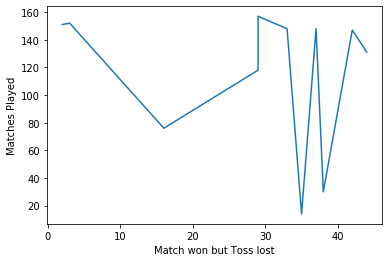

In [48]:
plt.plot(dfm[dfm.winner!=dfm.toss_winner].winner.value_counts(),matches_played)
plt.xlabel("Match won but Toss lost")
plt.ylabel("Matches Played")

Text(0, 0.5, 'Matches Played')

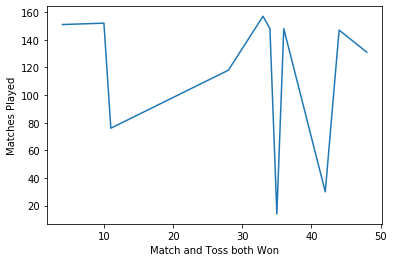

In [49]:
plt.plot(dfm[dfm.winner==dfm.toss_winner].winner.value_counts(),matches_played)
plt.xlabel("Match and Toss both Won")
plt.ylabel("Matches Played")

Graph above shows no influence of winning toss and match.

Maximum Man of the matches?

In [50]:
dfm.groupby('player_of_match').count().idxmax()[0]

'CH Gayle'

Total matches played by a team

In [51]:
matches_played

,0
Chennai Super Kings,131
Delhi Daredevils,147
Gujarat Lions,30
Kings XI Punjab,148
Kochi Tuskers Kerala,14
Kolkata Knight Riders,148
Mumbai Indians,157
Rajasthan Royals,118
Rising Pune Supergiant,76
Royal Challengers Bangalore,152


Total matches won by a team

In [52]:
matches_won=dfm.winner.value_counts().to_frame().rename(columns={"winner":"Matches_Won"})

In [53]:
matches_won

,Matches_Won
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,73
Sunrisers Hyderabad,71
Kings XI Punjab,70
Rajasthan Royals,63
Delhi Daredevils,62
Rising Pune Supergiant,27
Gujarat Lions,13


Total matches lost by a team

In [54]:
matches_played[0].subtract(matches_won["Matches_Won"],fill_value=0).to_frame().rename(columns={0:"Matches_Lost"})

,Matches_Lost
Chennai Super Kings,52
Delhi Daredevils,85
Gujarat Lions,17
Kings XI Punjab,78
Kochi Tuskers Kerala,8
Kolkata Knight Riders,71
Mumbai Indians,65
Rajasthan Royals,55
Rising Pune Supergiant,49
Royal Challengers Bangalore,79


Total toss won by a team

In [55]:
dfm.toss_winner.value_counts().to_frame().rename(columns={"toss_winner":"Toss Won"})

,Toss Won
Mumbai Indians,85
Sunrisers Hyderabad,78
Kolkata Knight Riders,78
Delhi Daredevils,72
Royal Challengers Bangalore,70
Kings XI Punjab,68
Chennai Super Kings,66
Rajasthan Royals,63
Rising Pune Supergiant,33
Gujarat Lions,15


Batting or bowling first after winning toss

In [56]:
dfm.toss_decision.value_counts()
#Out of total toss team has choosen to field first.

field    363
bat      273
Name: toss_decision, dtype: int64

Batting First Wins vs Batting Second Wins After Winning Toss

In [57]:
#plt.plot(dfm[dfm["toss_decision"]=="bat"].winner.value_counts(),dfm[dfm["toss_decision"]=="field"].winner.value_counts())df
dfm[(dfm["toss_decision"]=='bat')& (dfm["winner"]==dfm["toss_winner"])].winner.value_counts().sum()

124

In [58]:
type(dfm["winner"]==dfm["toss_winner"])

pandas.core.series.Series

In [59]:
dfm[dfm["toss_decision"]=="field"].winner.value_counts()

Mumbai Indians                 51
Kings XI Punjab                50
Royal Challengers Bangalore    47
Kolkata Knight Riders          43
Sunrisers Hyderabad            41
Delhi Daredevils               34
Rajasthan Royals               33
Chennai Super Kings            29
Rising Pune Supergiant         16
Gujarat Lions                  11
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

In [ ]:
dfm[dfm["toss_decision"]].team1

Types of deliveries

In [ ]:
dfd.shape

In [ ]:
dfd.head()

Dismissals kind

In [ ]:
dfd["dismissal_kind"].isnull().value_counts()

In [ ]:
dfd.dismissal_kind.value_counts()

Above analysis says out of 150460 records,143022 records doesn't have dismisal kind value populated.

Total wickets between differnt overs

In [ ]:
dfd[dfd["over"]==1].player_dismissed.value_counts().sum()

In [ ]:
player_dismissed_per_over={}
for i in range(1,21):
    player_dismissed_per_over.update({i:dfd[dfd["over"]==i].player_dismissed.value_counts().sum()})

In [ ]:
player_dismissed_per_over

In [ ]:
lists = sorted(player_dismissed_per_over.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

Total runs conceded by a team in all seasons

In [ ]:
total_runs_per_team={}
for i in pd.unique(dfd.batting_team):
    total_runs_per_team.update({i:dfd[dfd["batting_team"]==i].total_runs.value_counts().sum()})

In [ ]:
sorted(total_runs_per_team.items(), key=operator.itemgetter(1))

In [ ]:
dfd.head()

Maximum type of dismissals

In [ ]:
print("Maximum type of dismissals is *{}*".format(dfd.dismissal_kind.value_counts().idxmax()))

Total runs conceded per ball by different bowlers

In [ ]:
total_runs_per_bowler={}
for i in pd.unique(dfd.bowler):
    total_runs_per_bowler.update({i:(dfd[dfd["bowler"]==i].total_runs.value_counts().sum())/(dfd[dfd["bowler"]==i].over.value_counts().count())})

In [ ]:
sorted(total_runs_per_bowler.items(), key=operator.itemgetter(1))

Total wickets taken by bowler excluding run out and retired hurt

In [ ]:
temp=dfd[dfd["dismissal_kind"]!="run out"]
temp1=temp[temp["dismissal_kind"]!="retired hurt"]

In [ ]:
total_wickets_bowler={}
for i in pd.unique(dfd.bowler):
    total_wickets_bowler.update({i:(temp1[temp1["bowler"]==i].dismissal_kind.value_counts().sum())})

In [ ]:
sorted(total_wickets_bowler.items(), key=operator.itemgetter(1))
#sorted(total_wickets_bowler.values()!=0,perator.itemgetter(1))

Total runs scored by different batsman while chasing

In [ ]:
dfd.head()

Maximum wickets taken in death overs excluding run outs and retired hurt

In [ ]:
#temp1[temp1["over"]>=15]
max_wicket_death_over={}
for i in range(15,21):
    max_wicket_death_over.update({i:(temp1[temp1["over"]==i].dismissal_kind.value_counts().sum())})

In [ ]:
print("Maximum wickets taken were in {} over excluding run outs and retired hurt".format(max(max_wicket_death_over,key=max_wicket_death_over.get)))

Minimum runs conceded in death overs per ball

In [ ]:
min_run_death_over_per_ball={}
for i in range(15,21):
    min_run_death_over_per_ball.update({i:(dfd[dfd["over"]==i].total_runs.value_counts().sum()/len(pd.unique(dfd.match_id))*30)})

In [ ]:
dfd[dfd["over"]>=15].total_runs.value_counts()/len(pd.unique(dfd.match_id))*30

In [ ]:
#len(pd.unique(dfd.match_id))*30
min_run_death_over_per_ball

Total runs socred by a different team in all seasons

Total runs scored in different overs

Total runs scored by diffrent batsman

Total runs scored by Virat Kohli / Any Batsman against various teams

Total runs scored by Virat Kohli / Any Batsman against all the bowlers


Maximum centuries scored by a batsman

Best Fielder in terms of runout

Best Fielder in terms of catches

Best Keeper in terms of catching and stumping